# Classification Tree

In [1]:
getwd()
setwd("H://")
spam_train=load('spamtrain.rda')
spam_test=load('spamtest.rda')
library(rpart)
spam.tree=rpart(class~.,data=spam.train, method="class",
                control=rpart.control(minsplit=0,cp=0.01),
                parms=list(split="information"))
spam.tree.gini=rpart(class~.,data=spam.train, method="class",
                control=rpart.control(minsplit=0,cp=0.01),
                parms=list(split="gini"))
library(rpart.plot)

[1] "C:/Users/proid_000/Desktop"

Warning message:
: package 'rpart' was built under R version 3.1.3Warning message:
: package 'rpart.plot' was built under R version 3.1.3

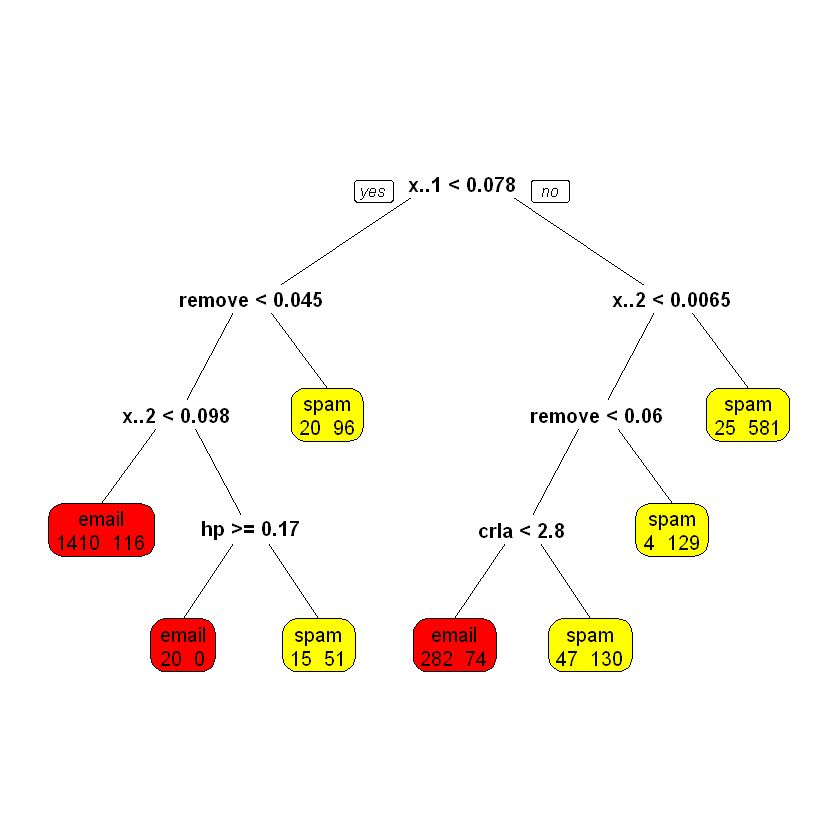

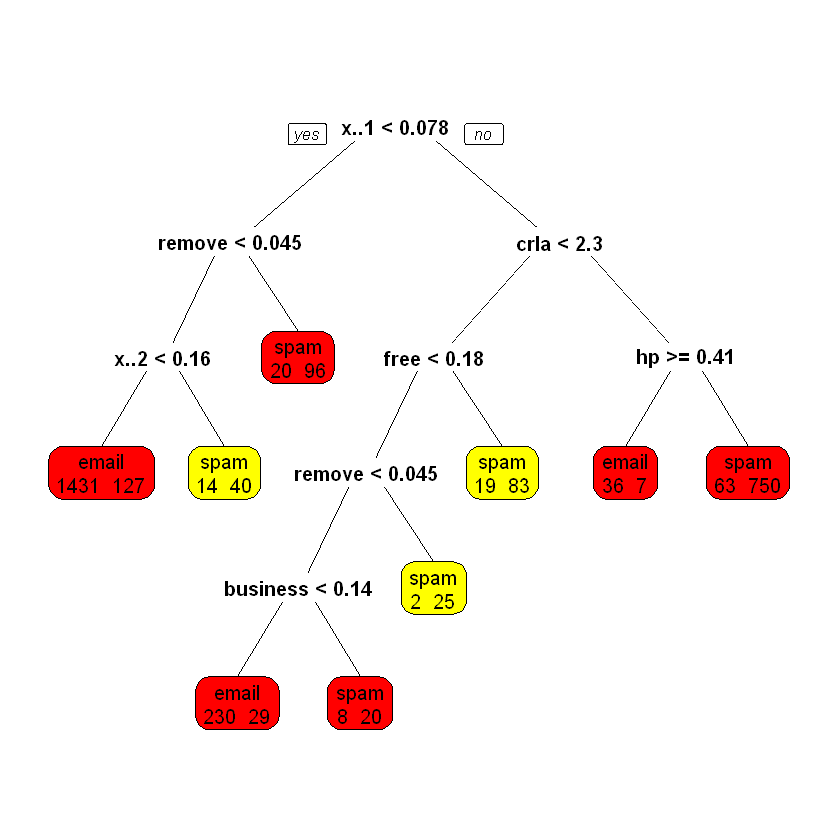

In [2]:
prp(spam.tree,extra=1,
    box.col=c("red",'yellow')[spam.tree$frame$yval])
prp(spam.tree.gini,extra=1,
    box.col=c("red",'yellow')[spam.tree$frame$yval])

In [3]:
p1=predict(spam.tree,newdata=spam.test)
p2=predict(spam.tree,newdata=spam.test,type='class')
View(p1)
View(p2)

p3=data.frame(p2)
result=cbind(p3[,1],spam.test[,'class'])
result=data.frame(result)
colnames(result)=c("Predict","Real")

wrong_predict=result[result["Predict"]!=result["Real"],]
wrong_count=nrow(wrong_predict)
error_rate=wrong_count/nrow(result)
error_rate #0.1093067

[1] 0.1093067

In [4]:
#gini predict
p2.gini=predict(spam.tree.gini,newdata=spam.test,type='class')
p3.gini=data.frame(p2.gini)
result.gini=cbind(p3.gini[,1],spam.test[,'class'])
result.gini=data.frame(result.gini)
colnames(result.gini)=c("Predict","Real")

wrong_predict.gini=result.gini[result.gini["Predict"]!=result.gini["Real"],]
wrong_count.gini=nrow(wrong_predict.gini)
error_rate=wrong_count.gini/nrow(result.gini)
error_rate #0.105559

[1] 0.105559

# Prune Tree

Warning message:
: labs do not fit even at cex 0.15, there may be some overplotting

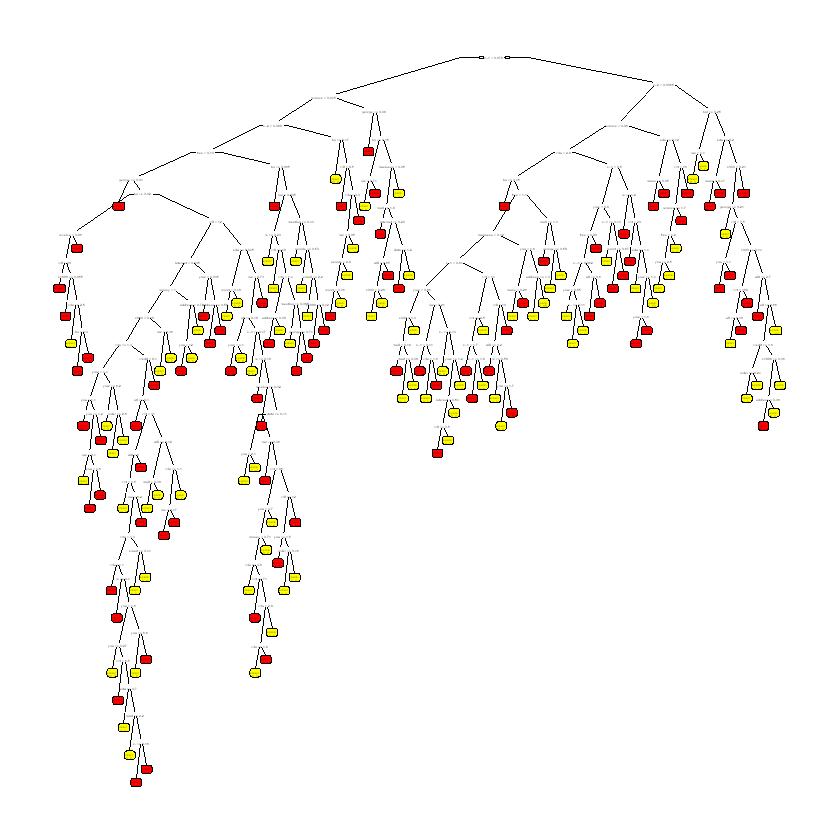

In [5]:
#Prune Tree
set.seed(1234)
library(rpart)
spam.tree.huge=rpart(class~.,data=spam.train, method="class",
                control=rpart.control(minsplit=1,cp=0,maxdepth=30),
                parms=list(split="information"))
prp(spam.tree.huge,extra=1,
    box.col=c("red",'yellow')[spam.tree$frame$yval])

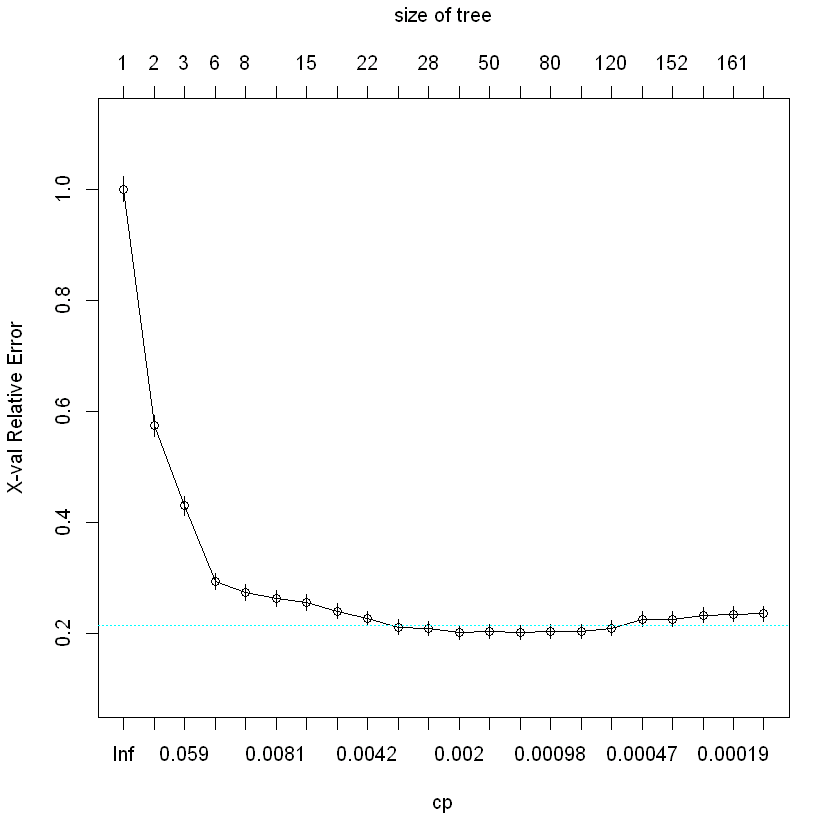

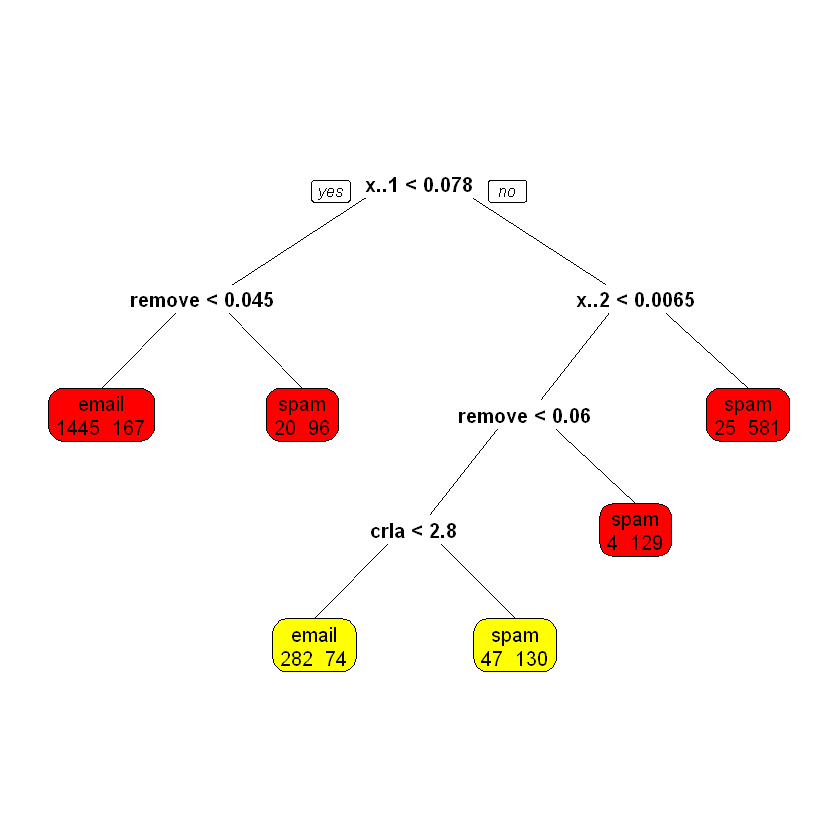

In [6]:
##CP Plot to set Complexity Parameter
plotcp(spam.tree.huge,minline=T,col=5,upper = "size")

pr.spam.tree.huge=prune(spam.tree.huge,cp=0.029)
prp(pr.spam.tree.huge,extra=1,
    box.col=c("red",'yellow')[spam.tree$frame$yval])


# Regression Tree

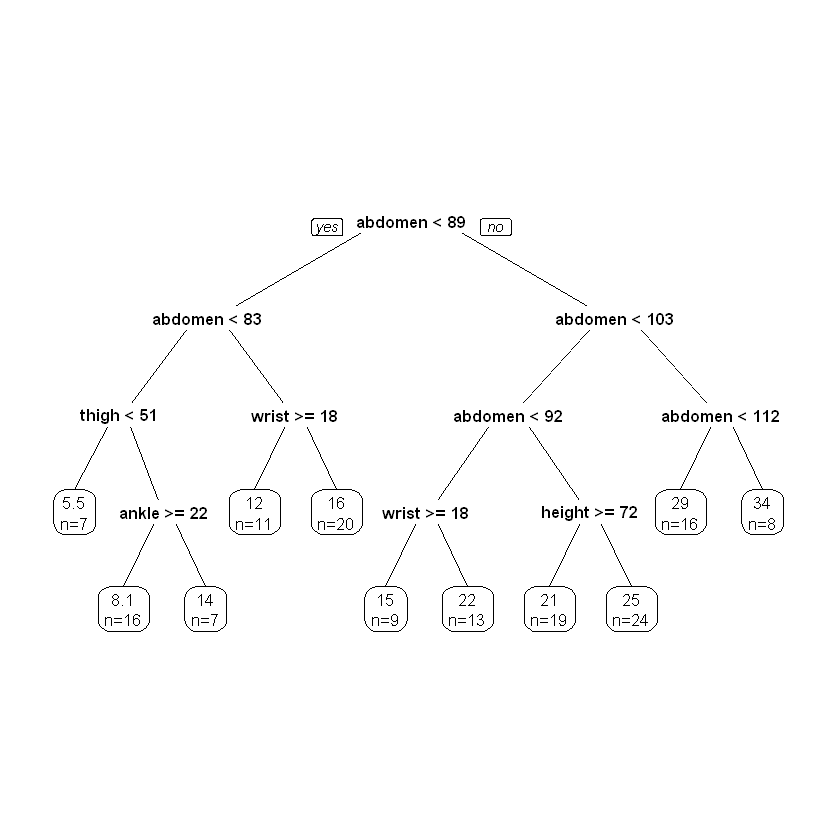

In [7]:
#Regression Tree
load("bdfattrain.rda")
load("bdfattest.rda")
bdfat.tree =rpart(bodyfat~.,data=bdfat.train,method ='anova')
prp(bdfat.tree,extra=1)